In [91]:
import pandas as pd, json, csv, matplotlib.pyplot as plt

def search_criteria (): 
    
    '''This function will create the search criteria dictionary; keys will be the column headers; 
    values will be empty lists. The dictionary will be converted to a json file.'''
    
    #create dictionary of search criteria 
    search_criteria_dict={"SchoolDistrict":[" "]}
    
    #open a file to which the dictionary can be written
    json_search=open('search_crit.json','w')
    #serialize the dictionary with json 
    json.dump(search_criteria_dict,json_search)

    #print confirmation messages
    print('Search Criteria Json file created.')



In [109]:
def json_search_crit():
    
    #handle exceptions for missing files 
    try:
    
        '''This function will read in the empty json file search criteria, and update the 
        json dictionary with new values (School Districts) given by user.'''
    
        #open file for reading
        with open('search_crit.json','r') as read_json_search:
            

        #covnert to json dictionary/python object to be operationalized 
            jread=json.load(read_json_search)
            
        #update json dictionary with new values given by user; use "all" to see all records 
        #Enter desired school district in brackets: []
            jread['SchoolDistrict']=['Avonworth', 'Deer Lakes',\
                                    'Highlands', 'Montour']

            #return the dictionary of desired criteria
            return jread
    
    #handle exception raised by missing file
    #print error message in final function to avoid redundant printing 
    except FileNotFoundError:
        print('')
 


In [110]:
def read_csv():
    
    '''This function will read in the entire csv of records that provide the data
    on lead levels'''
    
    try:
        
        #read csv file of school data into a dictionary 
        csv_read=open('schooldistrictlead.csv','r')
        reader=csv.DictReader(csv_read)
        
        #return reader object 
        return reader
    
    except FileNotFoundError: 
        print('File may be missing; check file name.')
        
read_csv()



In [111]:
def clean_csv():
    
    '''This function takes in the csv dictionaries and removes empty data. It puts it back into 
    into a list'''
    
    #take in csv reader object
    reader=read_csv()
    #make empty list to hold munged datt
    recordlist=[]
    
    #test records for empty data
    for dic in reader:
        if '' not in dic.values():
            #put eligible data into new list
            recordlist.append(dic)
            
    #return the list 
    return recordlist
   
#clean_csv()

In [112]:
import csv


def get_records():
    
    '''This function will receive the desired search criteria
    in a json dictionary. It also takes in the cleaned list of records. The two
    are compared and matching records are put into a list.'''
    
    try:
        
        #pass in the search criteria json dictionary from the previous function 
        jsc=json_search_crit()
        
        #pass in list of dictionary records
        reader=clean_csv()
    
        #create empty list to hold matching records
        leadlist=[]
       
        #loop through the list, testing the records for the search criteria 
        for record in reader:
            
        
             #compare record values with json values using in operator
            if record["SchoolDistrict"] in jsc["SchoolDistrict"]:
                if record['2015']!='':
                    #put qualifying records into a list
                    leadlist.append(record)
            
            #put all records into the list 
            if jsc["SchoolDistrict"]=="all":
                leadlist.append(record)
            
        #validate user input        
        if leadlist==[]:
            print('School district not found.')
     
        if jsc["SchoolDistrict"]==[]:
            print("Enter a school district.")
        
        #return list of matching records
        return leadlist
    
    #handle resultant exception rasied by missing file; TypeError results
    #print comprehensive error message in this function to avoid redundant printing 
    except: 
        print('Error')
        
#get_records()


In [122]:
def create_json():
    
    '''This function takes in the selected records list and writes them to a JSON file.'''
    
    #pass in the desired records
    leadlist=get_records()
    
    
    #open json file to write matching records 
    with open('matching_records.json','w') as lead_records:
        
        #serialize the list of dictionaries with json
        json.dump(leadlist,lead_records)
        
        
        print('Matching records written as Json file.')

create_json()


Matching records written as Json file.


In [114]:
import pandas as pd


def clean_dataframe():
    
    '''This function will read in the matching records json file and put it into a dataframe.'''
    
    #open json file as a dataframe 
    school_df=pd.read_json('matching_records.json')
    
    #Transpose dataframe
    school_df=school_df.T
    #reset index to be uniform 
    school_df.reset_index(inplace=True)
    #move row to column headers 
    school_df.columns=school_df.iloc[0]
    #remove redundant row 
    school_df.drop(0, inplace=True)
    #rename column 
    school_df.rename(columns={'SchoolDistrict': 'Year'}, inplace=True)
    
    #return cleaned dataframe
    return school_df
  
 


In [120]:

def plot():
    
    '''This function takes in the cleaned dataframe and visualizes the data.'''
    #take in the dataframe 
    df=clean_dataframe()
    #get number of columsn to control the subplotting
    shape=df.shape
    
    #filter large data frames to have subplots
    if shape[1]>5:
        
        
        df.plot.line(x='Year', title="Student Lead Levels", subplots=True)
        #set y axis label using matplot lib
        plt.ylabel('% with Elevated Lead Levels')
        plt.show()
    else:
        #plot data with pandas
        graph=df.plot.line(x='Year', title="Student Lead Levels")
        #set y label with pandas 
        graph.set_ylabel("% with Elevated Lead Levels")
#plot()

Search Criteria Json file created.

Matching records written as Json file.




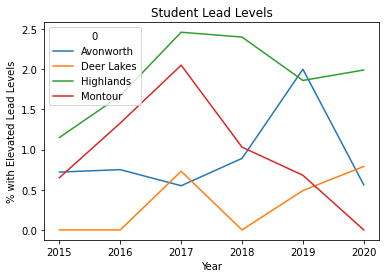

In [123]:
search_criteria()
print()
create_json()
print()
json_search_crit()
print()
read_csv()
plot()